In [1]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb

from scipy.stats import shapiro, skew, kurtosis, normaltest, bartlett, levene

In [2]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin=load_data("two_store")
origin

[data] https://data.hossam.kr/data/lab10/two_store.xlsx
[desc] 동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58
...,...,...
95,53,69
96,52,51
97,52,65
98,49,59


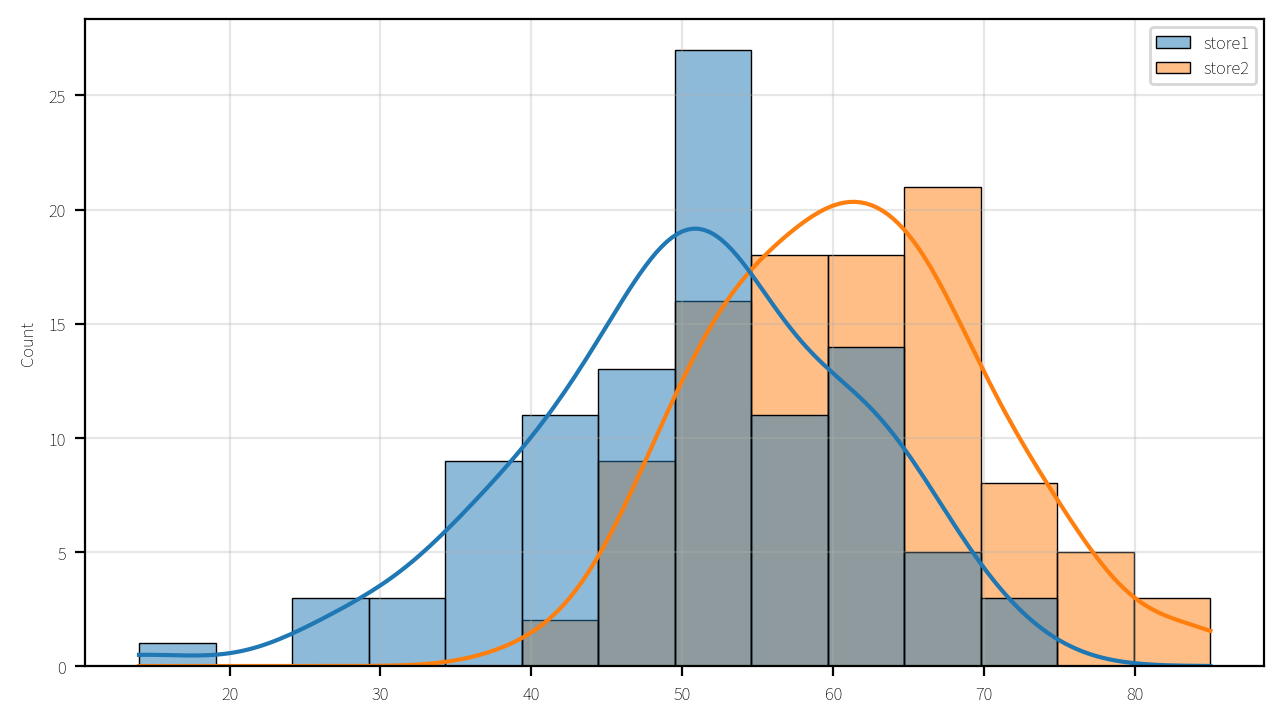

In [4]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.histplot(data=origin, kde=True, edgecolor="#000000",linewidth=0.5)
           
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

📘데이터 정규성 확인

📝Shaprio Wilk 검정

In [5]:
# (1)store1에 대한 정규성 확인
s,p = shapiro(origin['store1'])
"statistic:{0:.3f}, p-value:{1:.3f}, 정규성 충족 여부:{2}".format(s,
    p, p > 0.05)

'statistic:0.979, p-value:0.109, 정규성 충족 여부:True'

In [6]:
# (2)store2에 대한 정규성 확인
s,p = shapiro(origin['store2'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부:{2}".format(s,
        p, p > 0.5)

'statistic: 0.991, p-value: 0.731, 정규성 충족 여부:True'

📝Normal Test

In [7]:
s = skew(origin['store1'])
print("왜도:%0.3f" % s)
print("왜도의 절대값:%0.3f" % abs(s))

왜도:-0.506
왜도의 절대값:0.506


In [8]:
k = kurtosis(origin['store1'])
print("첨도: %0.3f" % k)
print("첨도의 절댓값: %0.3f" % abs(k))

첨도: 0.422
첨도의 절댓값: 0.422


In [9]:
s = skew(origin['store2'])
k = kurtosis(origin['store2'])
print("왜도의 절댓값:%0.3f, 첨도의 절대값: %0.3 % (abs(s), abs(k))")

왜도의 절댓값:%0.3f, 첨도의 절대값: %0.3 % (abs(s), abs(k))


In [10]:
# (2)NormalTest를 통한 정규성 검정
# store1의 정규성 확인
s, p = normaltest(origin['store1'])
"statistic:{0:.3f}, p-value:{1:.3f}, 정규성 충족 여부: {2}".format(s,
                                                            p, p > 0.05)

'statistic:5.651, p-value:0.059, 정규성 충족 여부: True'

In [11]:
# store2의 정규성 확인
s, p = normaltest(origin['store2'])
"statistic:{0:3f}, p-value:{1:.3f}, 정규성 충족 여부:{2}" .format(s,
        p,p > 0.5)

'statistic:1.173772, p-value:0.556, 정규성 충족 여부:True'

In [12]:
# 반복문으로 한 번에 처리하기
fmt = "[{0}]statistic: {1:.3f}, p-value:{2:.3f}, 정규성 충족 여부:{3}"

for c in origin.columns:
    s, p= normaltest(origin[c])
    print(fmt.format(c,s,p,p >= 0.05))

[store1]statistic: 5.651, p-value:0.059, 정규성 충족 여부:True
[store2]statistic: 1.174, p-value:0.556, 정규성 충족 여부:True


📘데이터 등분산성 확인

📝Bartlett 검정

In [15]:
# 파라미터 수의 제한이 없다.
s, p = bartlett(origin['store1'],  origin['store2'])
print("Bartlett 검정:statistic:{0:.3f}, p-value:{1:.3f}, 등분산성 충족여부: {2}".format(s, p, p > 0.05))

Bartlett 검정:statistic:3.143, p-value:0.076, 등분산성 충족여부: True


📝레빈 검정(Levene's test)

In [17]:
s,p =  levene(origin['store1'], origin['store2'])
print("Levene 검정:statistic:{0:.3f}, p-value:{1:.3f},등분산성 충족 여부:{2}".format(s, p, p > 0.5))

Levene 검정:statistic:1.360, p-value:0.245,등분산성 충족 여부:False


📝반복문으로 한번에 처리하기

In [19]:
normal_dist = True
data= origin.copy()
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0}검정:statistic:{1:.3f}, p-value:{2:.3f}, 정규성 충족 여부{3}".format(n,s,p,p > 0.05))

Bartlett검정:statistic:3.143, p-value:0.076, 정규성 충족 여부True


📘정규성, 등분산성 검정 결과표 만들기

In [20]:
data = melt(origin, var_name = "store", value_name = "value")
data

,store,value
0,store1,34
1,store1,63
2,store1,57
3,store1,50
4,store1,37
...,...,...
195,store2,69
196,store2,51
197,store2,65
198,store2,59


In [22]:
xname = 'store'
yname = 'value'

u1 = data[xname].unique()
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    filtered_data = data[data[xname]==i][yname]
    equal_var_fields.append(filtered_data)
    s,p = normaltest(filtered_data)

    normalize  = p> 0.05
    report.append({
        "field": i,
        "statistic": s,
        "p-value": p,
        "result": normalize,
    
    })
    normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s,p = bartlett(*equal_var_fields)
else:
    n = ":Levene"
    s, p = levene(*equal_var_fields)

report.append({
    "field":n,
    "statistic":s,
    "p-value":p,
    "result":p>0.05
})

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
store1,5.651229,0.059272,True
store2,1.173772,0.556056,True
Bartlett,3.143307,0.076239,True
